In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
SEED = 42

In [2]:
path='/content/drive/MyDrive/Portfolio Projects/santander-customer-transaction-prediction'

In [3]:
df= pd.read_csv(path+'/train.csv')
df.name = 'Data Set'

In [4]:
df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [5]:
df['target'].unique()

array([0, 1])

In [6]:
print('Number of Training Examples = {}'.format(df.shape[0]))
print('Training X Shape = {}'.format(df.shape))
print('Training y Shape = {}'.format(df['target'].shape[0]))
print(df.columns)

Number of Training Examples = 200000
Training X Shape = (200000, 202)
Training y Shape = 200000
Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)


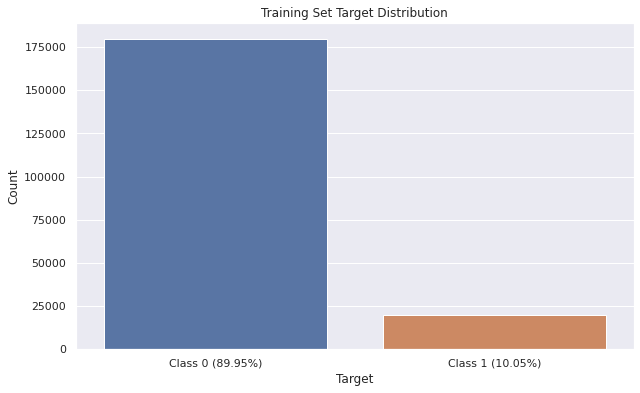

In [7]:
ones = df['target'].value_counts()[1]
zeros = df['target'].value_counts()[0]
ones_per = ones / df.shape[0] * 100
zeros_per = zeros / df.shape[0] * 100

plt.figure(figsize=(10, 6))
sns.countplot(df['target'])
plt.xlabel('Target')
plt.xticks((0, 1), ['Class 0 ({0:.2f}%)'.format(zeros_per), 'Class 1 ({0:.2f}%)'.format(ones_per)])
plt.ylabel('Count')
plt.title('Training Set Target Distribution')
plt.show()

In [8]:
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
df_crr_testing=df_corr

In [9]:
df_crr_testing.tail()

level_0  level_1    0
40396  var_128  var_128  1.0
40397  var_127  var_127  1.0
40398  var_126  var_126  1.0
40399  var_124  var_124  1.0
40400  var_199  var_199  1.0

In [10]:
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)

In [11]:
df_corr_nd.tail()

Feature 1 Feature 2  Correlation Coefficient
40190   var_110    target                 0.064275
40192     var_6    target                 0.066731
40194    var_12    target                 0.069489
40196    target   var_139                 0.074080
40198    target    var_81                 0.080917

In [12]:
df_corr_nd[np.logical_and(df_corr_nd['Feature 1'] != 'target', df_corr_nd['Feature 2'] != 'target')].tail()

Feature 1 Feature 2  Correlation Coefficient
39868   var_183   var_189                 0.009359
39870    var_81   var_174                 0.009490
39872   var_165    var_81                 0.009714
39874    var_53   var_148                 0.009788
39876   var_139    var_26                 0.009844

In [13]:
df_unique=df.agg(['nunique']).transpose().sort_values(by='nunique')

In [14]:
df_unique.drop('target',axis=0,inplace=True)

In [15]:
df_unique.reset_index(inplace=True)

In [16]:
df_unique.columns = ['Feature', 'Unique Count']

In [17]:
df_unique

Feature  Unique Count
0     var_68           451
1     var_91          7962
2    var_108          8525
3    var_103          9376
4     var_12          9561
..       ...           ...
196   var_61        159369
197   var_74        161058
198  var_117        164469
199   var_45        169968
200  ID_code        200000

[201 rows x 2 columns]

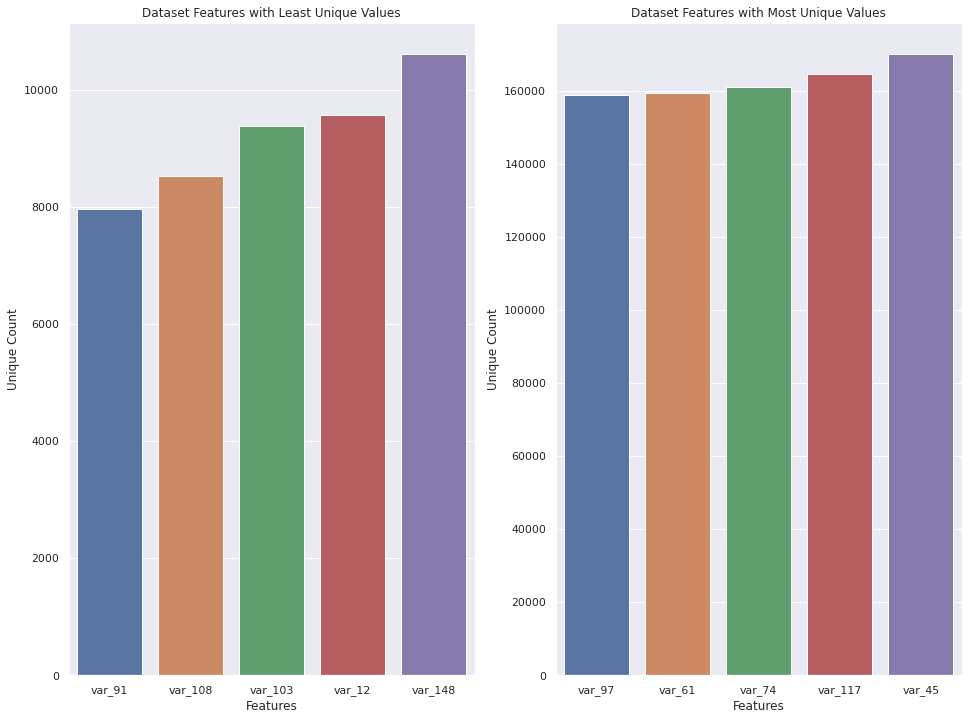

In [18]:
fig,axs=plt.subplots(ncols=2,nrows=1,figsize=(16,12))
sns.barplot(x=df_unique.iloc[1:6]['Feature'], y="Unique Count", data=df_unique[1:].head(), ax=axs[0])
sns.barplot(x=df_unique.iloc[-6:-1]['Feature'], y="Unique Count", data=df_unique[-6:-1].tail(), ax=axs[1])

for i in range(2):
  axs[i].set(xlabel='Features', ylabel='Unique Count')
        
axs[0].set_title('Dataset Features with Least Unique Values')
axs[1].set_title('Dataset Features with Most Unique Values')

plt.show()

In [19]:
df_qdist = pd.DataFrame(np.zeros((200, 9)), columns=['Quartile 1 Positives', 'Quartile 2 Positives', 'Quartile 3 Positives', 'Quartile 4 Positives',
                                                     'Quartile 1 Positive Percentage', 'Quartile 2 Positive Percentage', 'Quartile 3 Positive Percentage', 'Quartile 4 Positive Percentage',
                                                     'Quartile Order'])

In [20]:
features = [col for col in df.columns.values.tolist() if col.startswith('var')]
quartiles = np.arange(0, 1, 0.25)
df_qdist.index = features

In [21]:
for i, feature in enumerate(features):
    for j, quartile in enumerate(quartiles):
        target_counts = df[np.logical_and(df[feature] >= df[feature].quantile(q=quartile),df[feature] < df[feature].quantile(q=quartile + 0.25))].target.value_counts()
        ones_per = target_counts[1] / (target_counts[0] + target_counts[1]) * 100
        df_qdist.iloc[i, j] = target_counts[1]
        df_qdist.iloc[i, j + 4] = ones_per

pers = df_qdist.columns.tolist()[4:-1]         
        
for i, index in enumerate(df_qdist.index):
    order = df_qdist[pers].iloc[[i]].sort_values(by=index, ascending=False, axis=1).columns
    order_str = ''.join([col[9] for col in order])
    df_qdist.iloc[i, 8] = order_str        
                
df_qdist = df_qdist.round(2)
df_qdist.head(10)

Quartile 1 Positives  Quartile 2 Positives  Quartile 3 Positives  \
var_0                4518.0                4472.0                4725.0   
var_1                4325.0                4641.0                5093.0   
var_2                4449.0                4432.0                4926.0   
var_3                4850.0                4930.0                5105.0   
var_4                4931.0                4937.0                4931.0   
var_5                4601.0                4819.0                5011.0   
var_6                4244.0                4288.0                5036.0   
var_7                5140.0                4980.0                5060.0   
var_8                4630.0                5043.0                5034.0   
var_9                5775.0                5088.0                4902.0   

       Quartile 4 Positives  Quartile 1 Positive Percentage  \
var_0                6383.0                            9.04   
var_1                6039.0                            8.65   
var_2                6291.0                            8.90   
var_3                5213.0                            9.70   
var_4                5299.0                            9.86   
var_5                5667.0                            9.20   
var_6                6530.0                            8.49   
var_7                4918.0                           10.28   
var_8                5391.0                            9.26   
var_9                4333.0                           11.55   

       Quartile 2 Positive Percentage  Quartile 3 Positive Percentage  \
var_0                            8.94                            9.45   
var_1                            9.28                           10.19   
var_2                            8.86                            9.85   
var_3                            9.86                           10.21   
var_4                            9.87                            9.86   
var_5                            9.64                           10.02   
var_6                            8.58                           10.07   
var_7                            9.96                           10.12   
var_8                           10.09                           10.07   
var_9                           10.18                            9.80   

       Quartile 4 Positive Percentage Quartile Order  
var_0                           12.77           4312  
var_1                           12.08           4321  
var_2                           12.58           4312  
var_3                           10.43           4321  
var_4                           10.60           4213  
var_5                           11.33           4321  
var_6                           13.06           4321  
var_7                            9.84           1324  
var_8                           10.78           4231  
var_9                            8.67           1234

In [22]:
target_counts

0    44410
1     5590
Name: target, dtype: int64

In [23]:
df_qdist[np.logical_or(df_qdist['Quartile Order'].str.startswith('2'), df_qdist['Quartile Order'].str.startswith('3'))]

Quartile 1 Positives  Quartile 2 Positives  Quartile 3 Positives  \
var_17                 4996.0                5025.0                5067.0   
var_30                 4982.0                5059.0                5006.0   
var_100                4946.0                5104.0                5008.0   
var_101                5164.0                5171.0                4836.0   
var_185                5025.0                5006.0                5083.0   

         Quartile 4 Positives  Quartile 1 Positive Percentage  \
var_17                 5010.0                            9.99   
var_30                 5051.0                            9.96   
var_100                5040.0                            9.89   
var_101                4927.0                           10.33   
var_185                4983.0                           10.05   

         Quartile 2 Positive Percentage  Quartile 3 Positive Percentage  \
var_17                            10.05                           10.13   
var_30                            10.12                           10.01   
var_100                           10.21                           10.02   
var_101                           10.34                            9.67   
var_185                           10.01                           10.17   

         Quartile 4 Positive Percentage Quartile Order  
var_17                            10.02           3241  
var_30                            10.10           2431  
var_100                           10.08           2431  
var_101                            9.85           2143  
var_185                            9.97           3124

In [24]:
for i, col in enumerate(pers):    
    print('There are {} features that have the highest positive target percentage in Quartile {}'.format(df_qdist[df_qdist['Quartile Order'].str.startswith(str(i + 1))].count()[0],i + 1))
    print('Quartile {} max positive target percentage = {}% ({})'.format(i + 1, df_qdist[col].max(), df_qdist[col].argmax()))
    print('Quartile {} min positive target percentage = {}% ({})\n'.format(i + 1, df_qdist[col].min(), df_qdist[col].argmin()))

There are 94 features that have the highest positive target percentage in Quartile 1
Quartile 1 max positive target percentage = 14.35% (81)
Quartile 1 min positive target percentage = 8.49% (6)

There are 3 features that have the highest positive target percentage in Quartile 2
Quartile 2 max positive target percentage = 10.68% (149)
Quartile 2 min positive target percentage = 8.58% (6)

There are 2 features that have the highest positive target percentage in Quartile 3
Quartile 3 max positive target percentage = 10.46% (184)
Quartile 3 min positive target percentage = 8.4% (81)

There are 101 features that have the highest positive target percentage in Quartile 4
Quartile 4 max positive target percentage = 13.43% (110)
Quartile 4 min positive target percentage = 8.32% (34)



In [25]:
df_qdist.shape

(200, 9)

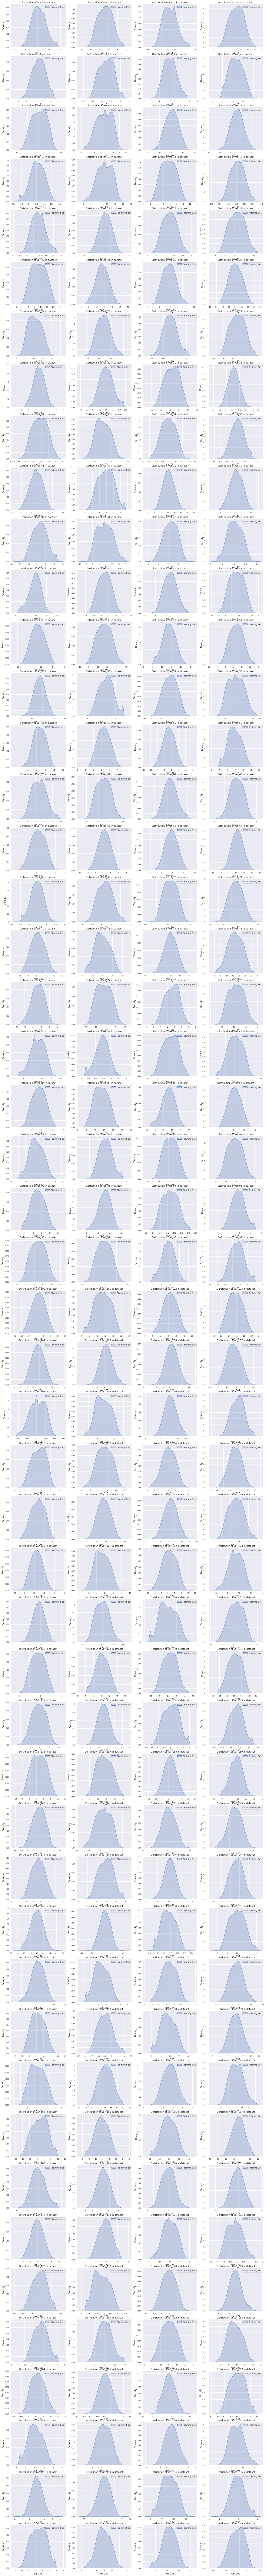

In [26]:
features = [col for col in df.columns.tolist() if col.startswith('var')]
nrows = 50
fig, axs = plt.subplots(nrows=50, ncols=4, figsize=(24, nrows * 5))

for i, feature in enumerate(features, 1):
    plt.subplot(50, 4, i)
    sns.kdeplot(df[feature], bw='silverman', label='Training Set', shade=True)
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.tick_params(axis='y', which='major', labelsize=8)
    plt.legend(loc='upper right')
    plt.title('Distribution of {} in dataset'.format(feature))
    
plt.show()

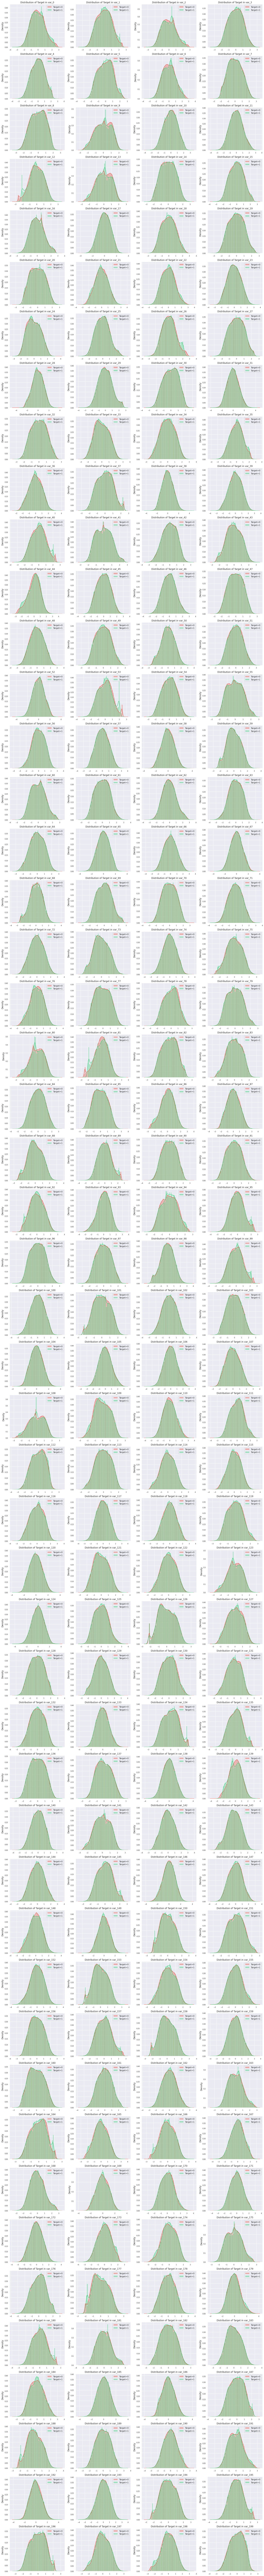

In [27]:
features = [col for col in df.columns.tolist() if col.startswith('var')]

nrows = 50
fig, axs = plt.subplots(nrows=50, ncols=4, figsize=(24, nrows * 5))

for i, feature in enumerate(features, 1):
    plt.subplot(50, 4, i)
    
    sns.distplot(StandardScaler().fit_transform(df[df['target'] == 0][feature].values.reshape(-1, 1)), label='Target=0', hist=True, color='#e74c3c')
    sns.distplot(StandardScaler().fit_transform(df[df['target'] == 1][feature].values.reshape(-1, 1)), label='Target=1', hist=True, color='#2ecc71')
    
    plt.tick_params(axis='x', which='major', labelsize=8)
    plt.tick_params(axis='y', which='major', labelsize=8)
    
    plt.legend(loc='upper right')
    plt.xlabel('')
    plt.title('Distribution of Target in {}'.format(feature))
    
plt.show()

In [28]:
import imblearn

In [29]:
columns=df.columns.to_list()
columns=[c for c in columns if c not in ['ID_code','target']]
target='target'
state=np.random.RandomState(42)

In [30]:
X=df[columns]
Y=df[target]
print(X.shape)
print(Y.shape)

(200000, 200)
(200000,)


In [31]:
from imblearn.combine import SMOTETomek

In [33]:
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_resample(X,Y)

KeyboardInterrupt: ignored

In [ ]:
print(x_res.shape,y_res.shape)

In [ ]:
from collections import Counter
print("Original Dataset Shape{}".format(Counter(Y)))
print("Modified Dataset Shape{}".format(Counter(y_res)))